## Landau Damping in VlaPy
### Archis Joglekar
### May 24, 2020


#### This notebook provides an example of how one can use VlaPy. Here, we verify that the code reproduces Landau Damping for $k=0.3$.  To initialize the example, we apply an external force to the system for a short period of time. After this time, we observe evidence of damping of the electric field at the rate specified by Landau Damping theory.

### Import Packages

In [1]:
import numpy as np

from vlapy import manager
from diagnostics import landau_damping, z_function
import uuid

### Perform 1 run

### Initialize simulation and driver

In [2]:
all_params_dict = {
    "nx": 48,
    "xmin": 0.0,
    "xmax": 2.0 * np.pi / 0.3,
    "nv": 512,
    "vmax": 6.0,
    "nt": 1000,
    "tmax": 100,
    "nu": 0.0,
}

pulse_dictionary = {
    "first pulse": {
        "start_time": 0,
        "rise_time": 5,
        "flat_time": 10,
        "fall_time": 5,
        "a0": 1e-6,
        "k0": 0.3,
    }
}

pulse_dictionary["first pulse"]["w0"] = np.real(
    z_function.get_roots_to_electrostatic_dispersion(
        wp_e=1.0, vth_e=1.0, k0=pulse_dictionary["first pulse"]["k0"]
    )
)

### Decide what you'd like to log, here we choose the driver frequency, wavenumber, and amplitude

In [3]:
params_to_log = ["w0", "k0", "a0"]


# Start a run
manager.start_run(
        all_params=all_params_dict,
        pulse_dictionary=pulse_dictionary,
        diagnostics=landau_damping.LandauDamping(params_to_log),
        name="test-Landau Damping",
    )

100%|██████████| 1000/1000 [00:09<00:00, 103.21it/s]


### The data and metadata from that simulation can be found by launching the MLFlow UI
### This requires one to launch an MLFlow server by executing `mlflow ui` from the directory of execution.
### An MLFlow UI becomes accessible at `http://localhost:5000` . We provide a screenshot below

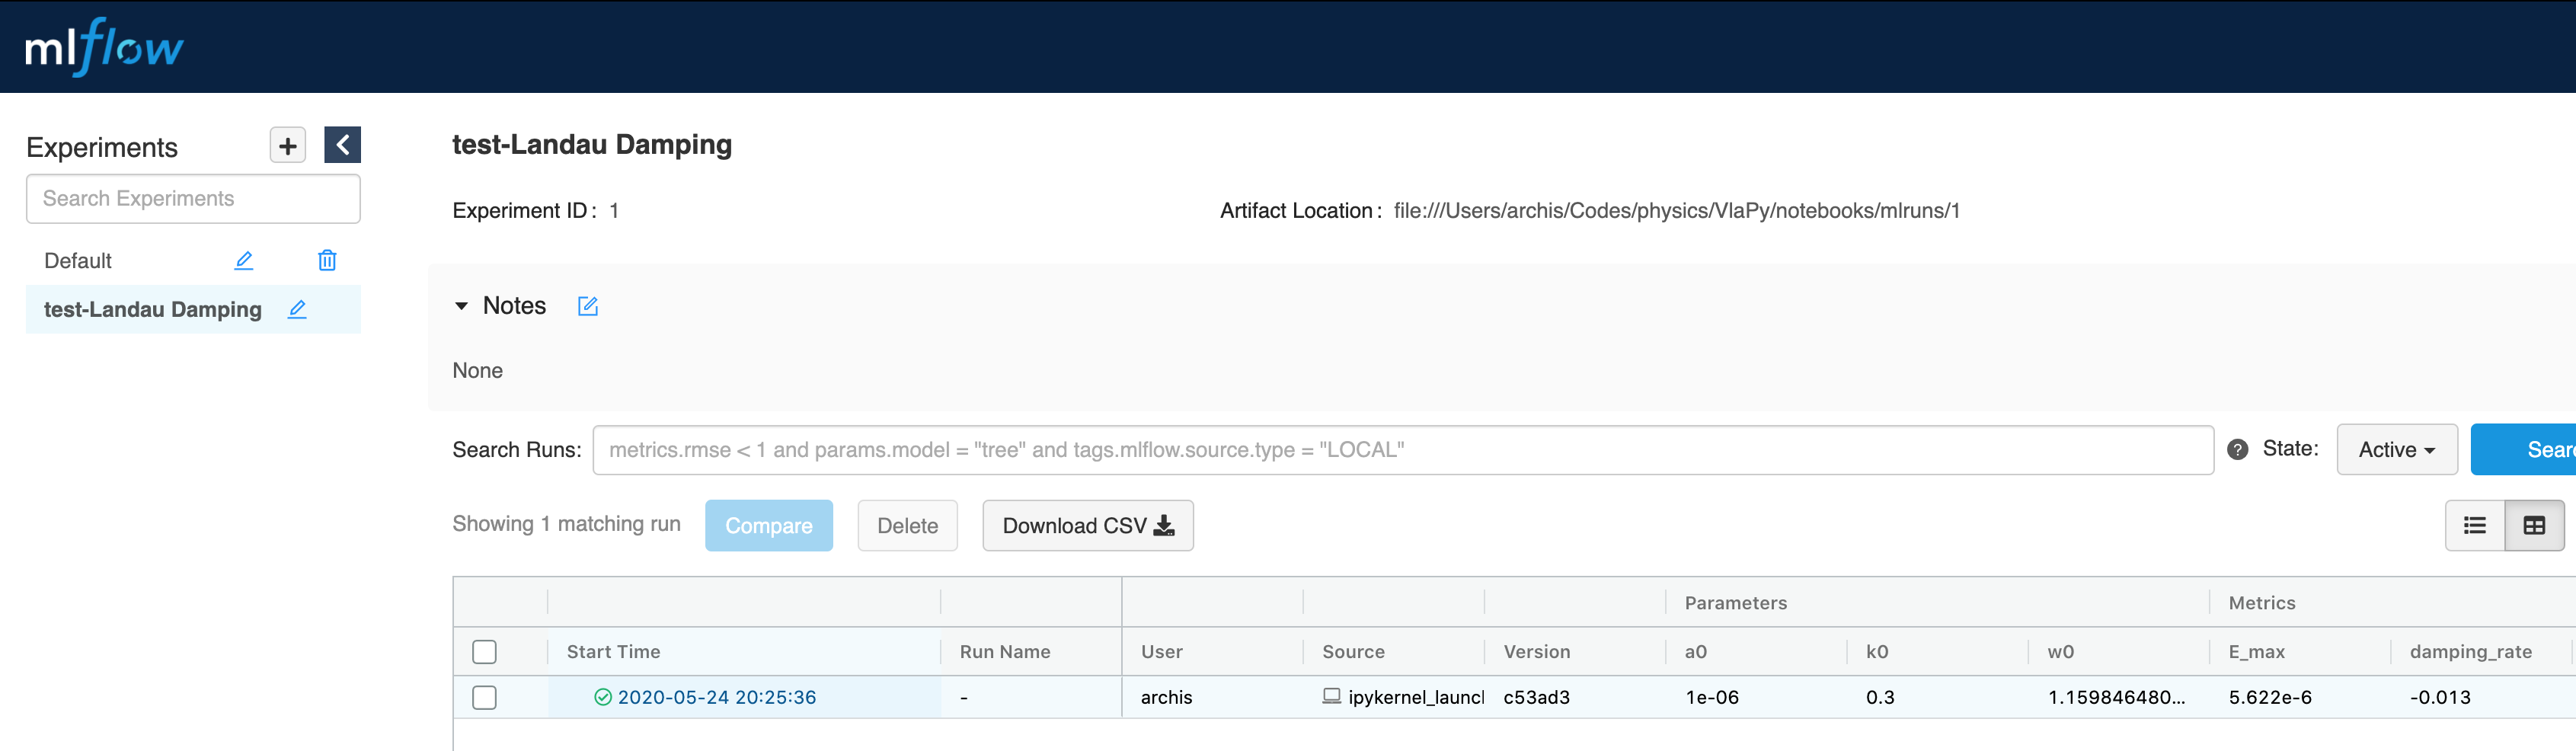

In [7]:
import os
from IPython.display import Image

Image(os.path.join(os.getcwd(),"screenshots_for_example", "ui.png"))

## This UI records any parameters and metrics
## Most importantly, it also shows where the files were stored for that particular run.

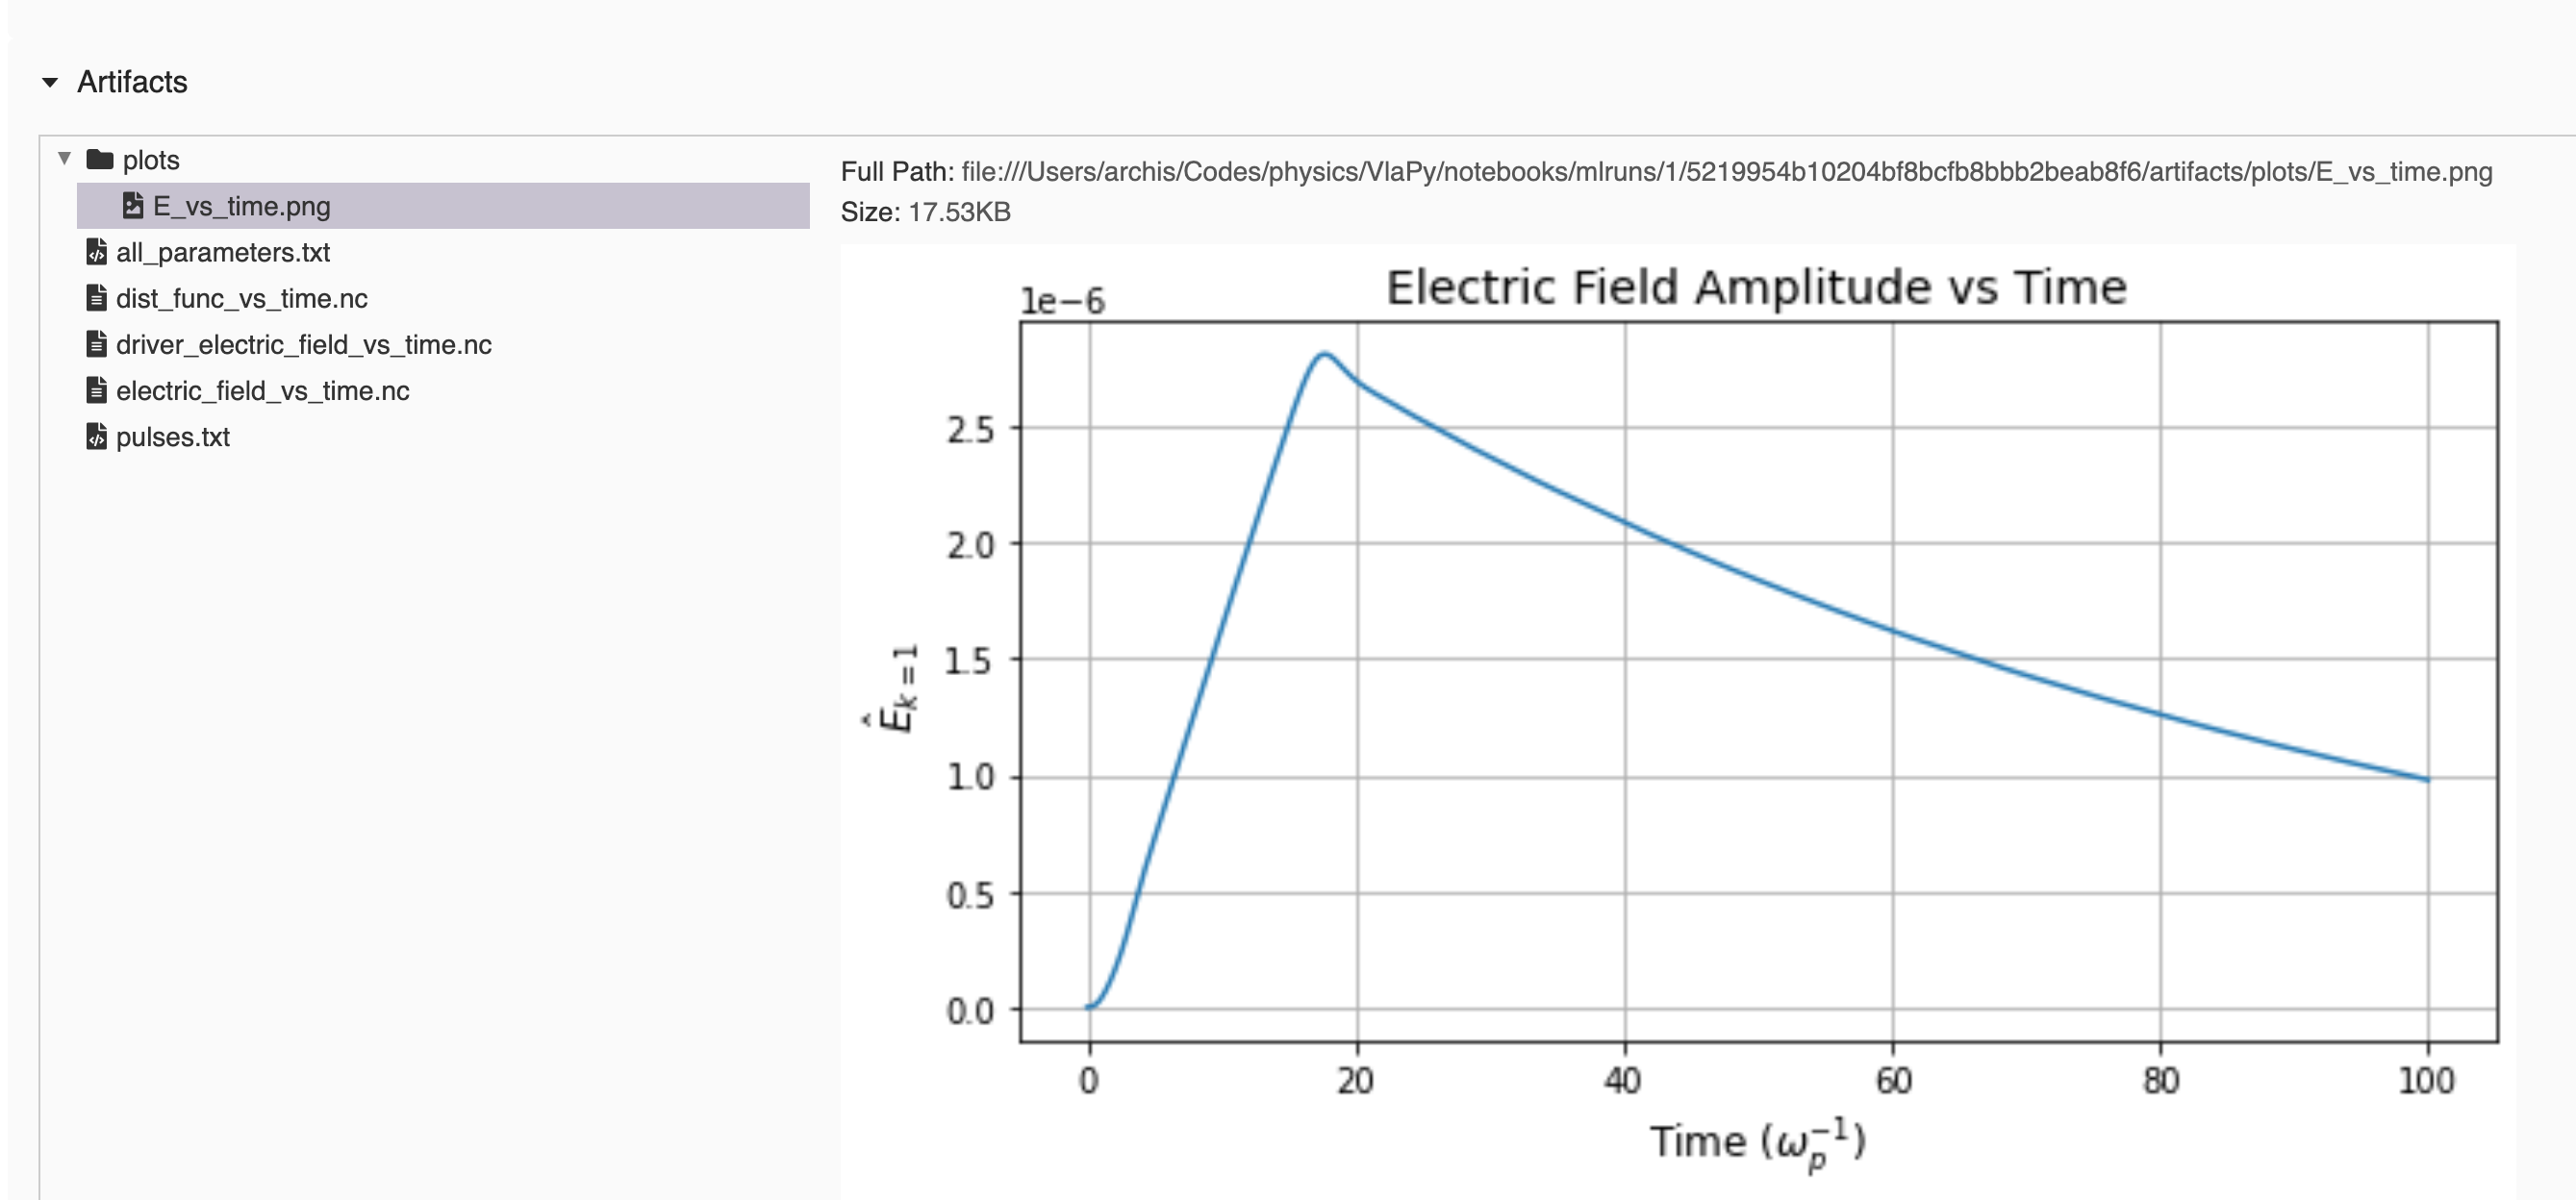

In [8]:
Image(os.path.join(os.getcwd(), "screenshots_for_example", "damping.png"))

### Note that the damping rate is as expected within a small error.